# MAE 3120
## HW 01

Due 02/12

In [3]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

### 1

The actual (true) voltage is 3.1605 V.

A digital multimeter is used to record the following voltages: 3.114, 3.010, 3.239, 3.019, 2.935, 3.050, 3.011, 3.125 V.

(a) Calculate the mean systematic (or bias) error, and the precision error for this set of data.

In [1]:
V_avg = (3.114 + 3.010 + 3.239 + 3.019 + 2.935 + 3.050 + 3.011 + 3.125)/8
V_true = 3.1605
MBE = V_true - V_avg
print(MBE, ' V')

0.09762499999999985  V


(b) If possible, how would you make the multimeter more accurate?

-> better calibration

(c) If possible, how would you make the multimeter more precise?

-> not possible

### 2

Consider the periodic function:

\begin{align}
y(t) = \frac{t}{\pi} \quad \text{for}\, -\pi \geq t > \pi
\end{align}

(a) Plot the function $y(t)$ for $-3 \pi \geq t > 3 \pi$.

(b) Is the function odd or even? What does this imply for the Fourier coefficients $A_n$ and $B_n$?

(c) Calculate $A_0$ and the $A_n$ and $B_n$.

(d) Plot the first 8 harmonics ($n = 1 : 8$).

(e) Plot of the sum of the first 8 harmonics (i.e. Fourier transform) overlapped with the original function.
Describe discrepancies between the Fourier series and the original function.

(f) Incease the number of harmonics in your Fourier transform. How many harmonics are necessary to
reconstruct the original curve well?

### 3  

The signal $y(t)$ is sampled at 4.1 Hz and 1,024 points are acquired:
\begin{align}
y(t) = 0.2425 + 1.2366 \cos(2 \pi t) + 2.2273 \cos(10 \pi t) - 1.7909 \cos(14 \pi t)
\end{align}

(a) Is there aliasing at any of the harmonics? If so which harmonic(s)?

-> the signal has harmonics: 1 Hz, 5 Hz, and 7 Hz.

sampling frequency is 4.1 Hz, to request Nyquist criterion max frequency that can be sampled without aliasing is < 4.1/2 < 2.05 Hz.  5 Hz and 7 Hz will be aliased

(b) Using FFTs, plot the spectrum. Remember to normalize the spectrum.

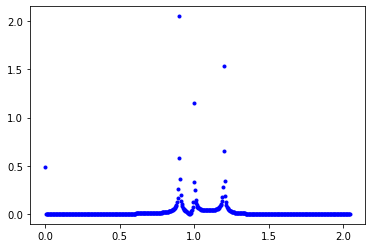

In [8]:
f_s = 4.1 # Hz
N = 1024 # # points
T_s = N/f_s # s

timestep = T_s/N # time increment (s)
t = np.arange(0,T_s,timestep) # time vector
y_t = 0.2425+1.2366*np.cos(2*np.pi*t)+2.2273*np.cos(10*np.pi*t)-1.7909*np.cos(14*np.pi*t)
sp = np.fft.fft(y_t) # compute FFT 

k = np.arange(int(N))
frq = k/T_s # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp1 = sp[range(int(N/2))]

pyplot.plot(frq,abs(sp1)*2/N,'b.'); # plotting the spectrum
# need to normalize y axis by *2/N

(c) Propose a new sampling rate to digitze the signal accurately and compute the new spectra with FFT. 

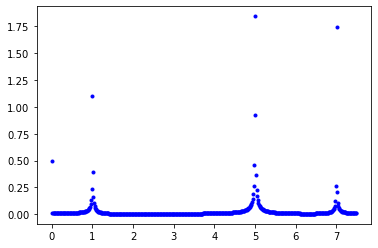

In [10]:
# to prevent aliasing at the highest frequency, f_s>2*7 Hz, select 15 Hz
f_s = 15 # Hz
N = 1024 # # points
T_s = N/f_s # s

timestep = T_s/N # time increment (s)
t = np.arange(0,T_s,timestep) # time vector
y_t = 0.2425+1.2366*np.cos(2*np.pi*t)+2.2273*np.cos(10*np.pi*t)-1.7909*np.cos(14*np.pi*t)
sp = np.fft.fft(y_t) # compute FFT 

k = np.arange(int(N))
frq = k/T_s # two sides frequency range
frq = frq[range(int(N/2))] # one side frequency range
sp1 = sp[range(int(N/2))]

pyplot.plot(frq,abs(sp1)*2/N,'b.'); # plotting the spectrum
# need to normalize y axis by *2/N

### 4

A voltage signal is sampled digitally in the laboratory at three different sampling frequencies. Here is a
record of the observations:

1- Data sampled at 256 Hz: A signal appears at 52 Hz with amplitude 3.0 V and another peak appears
at 112 Hz with amplitude 1.0 V.

2- Data sampled at 512 Hz: A signal appears at 204 Hz with amplitude 3.0 V. Another signal appears at
112 Hz, with amplitude close to 1.0 V.

3- Data sampled at 1,024 Hz: A signal appears at 204 Hz, with amplitude close to 3.0 V. Another signal appears 400 Hz, with amplitude close to 1.0 V. 

Explain any aliasing frequencies in these measurements? Show all your calculations for full credit. What are
most likely the true frequencies (and their corresponding amplitudes) in the voltage signal?

-> This signal has two harmonics: A_1 = 3.0 and A_2 = 1.0.  As the sampling rate changes, the frequency of the harmonics changes pointing to aliasing.  The best way to solve this problem is to assume that at the highest sampling rate there is no aliasing and making sure the apparent frequencies are consistent with lower sampling rate.

Focusing on A_1:  Assume 204 Hz is the true frequency. When sampling at 512 Hz, it won't be aliased, and wil be aliased at 256 Hz with an apparent frequency of 52 Hz.  This is self-consistent, A_1 has frequency 204 Hz.

Focusing on A_2: Assume 400 Hz is the true frequency.  It will be aliased when sampled at 512 Hz, with apparent frequency 112 Hz.  It will also be aliased when sampled at 256 Hz, with apparent frequency 112 Hz.  This is also consistent and the true frequency is 112 Hz.